**Machine Learning and Large Scale Data Analysis**



**HW1 Q6** 

**by Ying Cai**

In [1]:
import json  
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

In [2]:
with open(r'D:\UC\19S\ML&LSD\speeches.json', 'r') as f:
    speeches = json.loads(f.read())

In [11]:
df = pd.DataFrame.from_dict(speeches, orient='columns')
df.describe()

,president,text,year
count,226,226,226
unique,41,226,223
top,Franklin D. Roosevelt,"Mr. Speaker, Mr. President, distinguished Memb...",1981
freq,12,1,2


**(a)**

In [4]:
def countsent(text):
    sent_list = sent_tokenize(text)
    n_sent=len(sent_list)
    avg_len_sent=len(word_tokenize(text))/n_sent
    return n_sent,avg_len_sent

    

In [5]:
df["n_sent"]=0.0
df["avg_len"]=0.0

In [15]:
i=0
while i <226:
    x,y=countsent(df["text"].values[i])
    df.at[i,"n_sent"] = x
    df.at[i,"avg_len"] = y
    i=i+1


In [18]:
df["year"] = pd.to_numeric(df["year"])

In [37]:
df.loc[df["n_sent"] >1000]

,president,text,year,n_sent,avg_len,constant
155,Harry S Truman,"[\r\n\r\nReleased January 21, 1946. Dated Janu...",1946,1265.0,24.252964,1
193,Jimmy Carter,To the Congress of the United States: \r\n\r\...,1981,1349.0,27.405486,1


**(b)**

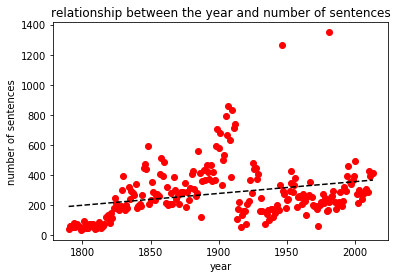

In [25]:
%matplotlib inline
df["constant"]=1
x,y,z=df[["year","constant"]],df["n_sent"],df["avg_len"]
beta1=np.dot(np.dot(np.linalg.inv(np.dot(x.transpose(),x)),x.transpose()),y)
k1,b1=beta1
fit1=lambda x: k1*x+b1
plt.plot(df["year"],df["n_sent"], 'ro',df["year"],fit1(df["year"]),"--k")
plt.xlabel("year")
plt.ylabel("number of sentences")
plt.title("relationship between the year and number of sentences")
plt.show()

In [38]:
df.loc[df["n_sent"] >1000]

,president,text,year,n_sent,avg_len,constant
155,Harry S Truman,"[\r\n\r\nReleased January 21, 1946. Dated Janu...",1946,1265.0,24.252964,1
193,Jimmy Carter,To the Congress of the United States: \r\n\r\...,1981,1349.0,27.405486,1


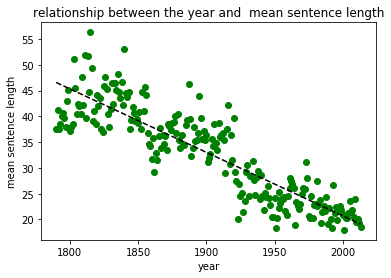

In [26]:
beta2=np.dot(np.dot(np.linalg.inv(np.dot(x.transpose(),x)),x.transpose()),z)
k2,b2=beta2
fit2=lambda x: k2*x+b2
plt.plot(df["year"],df["avg_len"], 'go',df["year"],fit2(df["year"]),"--k")
plt.xlabel("year")
plt.ylabel("mean sentence length")
plt.title("relationship between the year and  mean sentence length")
plt.show()

From above graphs we can see that the number of sentences in address increases slowly and the mean sentence length in words decreases in gerenal as time goes by.Two outliers of the number of sentences are year 1946 by Harry S Trueman and year 1981 by Jimmy Carter. The 1946 address combined both State of the Union Message and the Budget and the 1981 address was in written form, partly having explained the surprising length of them.The reason of such phenomenon might be respectively that more things need to be included in the address and that people prefer conciseness more as time goes by. 

**(c)**

In [41]:
def countword(text):
    n_word = len(word_tokenize(text))
    return n_word

In [42]:
df["n_word"]=0.0
i=0
while i <226:
    n=countword(df["text"].values[i])
    df.at[i,"n_word"] = n
    i=i+1

In [43]:
df.head()

,president,text,year,n_sent,avg_len,constant,n_word
0,George Washington,Fellow-Citizens of the Senate and House of Re...,1790,40.0,37.600000,1,1504.0
1,George Washington,Fellow-Citizens of the Senate and House of Re...,1791,60.0,41.216667,1,2473.0
2,George Washington,Fellow-Citizens of the Senate and House of Rep...,1792,61.0,37.491803,1,2287.0
3,George Washington,Fellow-Citizens of the Senate and House of Re...,1793,55.0,38.545455,1,2120.0
4,George Washington,Fellow-Citizens of the Senate and House of Re...,1794,80.0,40.012500,1,3201.0


In [44]:
df1=df[df["year"]<=1912]
df2=df[df["year"]>1912]

,year,n_sent,avg_len,constant,n_word
count,123.000000,123.000000,123.000000,123.0,123.000000
mean,1851.000000,283.626016,39.726058,1.0,10784.528455
std,35.651087,192.548670,5.007778,0.0,6783.573062
min,1790.000000,36.000000,29.228840,1.0,1489.000000
25%,1820.500000,123.500000,36.315891,1.0,5109.500000
50%,1851.000000,265.000000,38.643777,1.0,10018.000000
75%,1881.500000,390.000000,42.748817,1.0,14458.500000
max,1912.000000,856.000000,56.300000,1.0,29900.000000


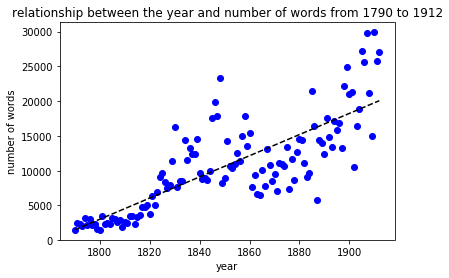

In [45]:
x1,y1=df1[["year","constant"]],df1["n_word"]
beta3=np.dot(np.dot(np.linalg.inv(np.dot(x1.transpose(),x1)),x1.transpose()),y1)
k3,b3=beta3
fit3=lambda x: k3*x+b3
plt.plot(df1["year"],df1["n_word"], 'bo',df1["year"],fit3(df1["year"]),"--k")
plt.xlabel("year")
plt.ylabel("number of words")
plt.title("relationship between the year and number of words from 1790 to 1912")
plt.show()

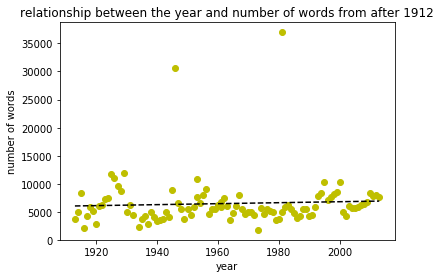

In [46]:
x2,y2=df2[["year","constant"]],df2["n_word"]
beta4=np.dot(np.dot(np.linalg.inv(np.dot(x2.transpose(),x2)),x2.transpose()),y2)
k4,b4=beta4
fit4=lambda x: k4*x+b4
plt.plot(df2["year"],df2["n_word"], 'yo',df2["year"],fit4(df2["year"]),"--k")
plt.xlabel("year")
plt.ylabel("number of words")
plt.title("relationship between the year and number of words from after 1912")
plt.show()

In general, the number of words in the address increased with time rather steadily before 1912 yet its increasing trend became very slight after 1912 if we negelect the two outliers —— 1946 and 1981. From 1801 to 1912, the address was ususally delivered in written form, which allows longer text and more details.After 1913 Woodrow Wilson re-established the practice of delivering the address in-person and orally, which requires the content not to be too long, otherwise the attention of audiences would get distracted. 

**(d)**

In [48]:
dfpre=df.groupby("president").mean()

In [53]:
dfpre.describe()

,year,n_sent,avg_len,constant,n_word
count,41.000000,41.000000,41.000000,41.0,41.000000
mean,1899.231707,288.952913,33.206763,1.0,9343.341667
std,63.422994,144.753144,8.474628,0.0,5319.195296
min,1793.000000,47.500000,19.957240,1.0,1929.250000
25%,1849.000000,216.000000,23.619416,1.0,5483.833333
50%,1890.500000,261.750000,34.861680,1.0,8355.000000
75%,1957.000000,387.625000,39.879426,1.0,11433.875000
max,2011.000000,666.500000,47.920307,1.0,24430.250000


In [55]:
dfpre[dfpre["avg_len"]==dfpre["avg_len"].max()]

,year,n_sent,avg_len,constant,n_word
president,,,,,
James Madison,1812.5,61.25,47.920307,1.0,2909.375


In [52]:
dfpre[dfpre["avg_len"]==dfpre["avg_len"].min()]

,year,n_sent,avg_len,constant,n_word
president,,,,,
George Bush,1990.5,258.25,19.95724,1.0,5088.25


In [56]:
dfpre[dfpre["avg_len"]==dfpre["avg_len"].quantile(0.25)]

,year,n_sent,avg_len,constant,n_word
president,,,,,
Calvin Coolidge,1925.5,398.166667,23.619416,1.0,9363.5


In [57]:
dfpre[dfpre["avg_len"]==dfpre["avg_len"].quantile(0.5)]

,year,n_sent,avg_len,constant,n_word
president,,,,,
Benjamin Harrison,1890.5,421.75,34.86168,1.0,14741.5


In [58]:
dfpre[dfpre["avg_len"]==dfpre["avg_len"].quantile(0.75)]

,year,n_sent,avg_len,constant,n_word
president,,,,,
Grover Cleveland,1890.5,386.375,39.879426,1.0,15125.5


James Madison has the longest sentences on average. George Bush has the shortest sentences. The median, 25% and 75% quantiles across all Presidents are Benjamin Harrison, Calvin Coolidge and Grover Cleveland respectively.

In [62]:
def findlongest(text):
    sentlist = sent_tokenize(text)
    longest = ""
    for sent in sentlist:
        if len(word_tokenize(longest))<=len(word_tokenize(sent)):
            longest=sent
        else:
            longest=longest
    return longest

def findshortest(text):
    sentlist = sent_tokenize(text)
    shortest = "Now, compute two regressions of the total number of words in a SOU versus year–one for the years 1790 to 1912, another for the years 1913 to the present."
    for sent in sentlist:
        if len(word_tokenize(shortest))>=len(word_tokenize(sent)):
            shortest=sent
        else:
            shortest=shortest
    return shortest

In [65]:
df["long"]=" "
df["short"]=" "
i=0
while i <226:    
    df.at[i,"long"] = findlongest(df["text"].values[i])
    df.at[i,"short"] = findshortest(df["text"].values[i])
    i=i+1

The shortest and longest sentence ever spoken (or written) in a SOU are as following:

In [73]:
df["short"].values

array(['WASHINGTON', 'WASHINGTON', 'WASHINGTON', 'WASHINGTON',
       'WASHINGTON', 'WASHINGTON', 'WASHINGTON', 'JOHN ADAMS',
       'JOHN ADAMS', 'JOHN ADAMS',
       'The negotiation on this subject is still depending.', 'JEFFERSON',
       'JEFFERSON', 'JEFFERSON', 'JEFFERSON', 'JEFFERSON', 'JEFFERSON',
       'JEFFERSON', 'JEFFERSON', 'JAMES MADISON', 'JAMES MADISON',
       'JAMES MADISON', 'JAMES MADISON', 'JAMES MADISON', 'JAMES MADISON',
       'JAMES MADISON', 'JAMES MADISON', 'JAMES MONROE', 'JAMES MONROE',
       'JAMES MONROE', 'JAMES MONROE', 'JAMES MONROE', 'JAMES MONROE',
       'JAMES MONROE', 'JAMES MONROE', 'JOHN QUINCY ADAMS',
       'JOHN QUINCY ADAMS', 'JOHN QUINCY ADAMS', 'JOHN QUINCY ADAMS',
       'ANDREW JACKSON', 'ANDREW JACKSON', 'ANDREW JACKSON',
       'ANDREW JACKSON', 'ANDREW JACKSON', 'ANDREW JACKSON',
       'ANDREW JACKSON', 'ANDREW JACKSON', 'M. VAN BUREN', 'M. VAN BUREN',
       'M. VAN BUREN', 'M. VAN BUREN', 'JOHN TYLER', 'JOHN TYLER',
       'JOHN

In [80]:
shortest = "Why"
for sent in df["short"].values:
    if sent != ".":
        if len(word_tokenize(shortest))>len(word_tokenize(sent)):
            shortest=sent
        else:
            shortest=shortest
    else:
        shortest=shortest
        


In [81]:
#shortest sentence
shortest

'Why'

In [82]:
longest = ""
for sent in df["long"].values:
    if len(word_tokenize(longest))<=len(word_tokenize(sent)):
        longest=sent
    else:
        longest=longest


In [83]:
#longest sentence
longest

'It shows that the ordinary revenues from all sources for the fiscal year ended June 30, 1883, amounted to $398,287,581.95, whereof there was received--\r\n\r\n \r\n\r\n \r\n\r\n \r\n\r\n \r\n\r\n From customs\r\n\r\n \r\n\r\n $214,706,496.93\r\n\r\n \r\n\r\n \r\n\r\n \r\n\r\n From internal revenue\r\n\r\n \r\n\r\n 144,720,368.98\r\n\r\n \r\n\r\n \r\n\r\n \r\n\r\n From sales of public lands\r\n\r\n \r\n\r\n 7,955,864.42\r\n\r\n \r\n\r\n \r\n\r\n \r\n\r\n From tax on circulation and deposits of national banks\r\n\r\n \r\n\r\n 9,111,008.85\r\n\r\n \r\n\r\n \r\n\r\n \r\n\r\n From profits on coinage, bullion deposits, and assays\r\n\r\n \r\n\r\n 4,460,205.17\r\n\r\n \r\n\r\n \r\n\r\n \r\n\r\n From other sources\r\n\r\n \r\n\r\n 17,333,637.60\r\n\r\n \r\n\r\n \r\n\r\n \r\n\r\n \r\n\r\n Total\r\n\r\n \r\n\r\n \r\n\r\n \r\n\r\n 398,287,581.95\r\n\r\n \r\n\r\n \r\n\r\n \r\n\r\n \r\n\r\n \r\n\r\n \r\n\r\nFor the same period the ordinary expenditures were:\r\n\r\n \r\n\r\n \r\n\r\n \r\n\r\n \r\n